# Decálogo

## Interface:
- Entorno para carga de archivos.
- About donde se presente el grupo.

## Entradas:
- (a) Dataset en formato csv. A partir de esta lectura, el usuario verá en pantalla las diferentes variables disponibles en su dataset y mostrará la lectura de los casos existentes en el dataset.
- (b) El usuario ingresa el número del caso de su interés, los cuales estarán en pantalla a partir del punto anterior.

## Salidas:
- (A) En texto, imprimir una lectura de las variables adquiridas desde el dataset.
- (B) Imprime el texto: Su caso elegido es: Caso n - Ya está programado.
- (C) Muestra los videos creados de código de especialización, con cuatro posibles salidas (Raramente sucedería) y también se imprime un texto: "La columna "n" contiene solo ceros y no se creará un video para ella." Este mensaje ya está programado y también está imprimiento.
- (D) Imprime la gráfica 2D
- (E) Imprime la gráfica 3d scatter
- (F) Imprime la gráfica 3d Surface

# Datos

In [2]:
# (a)

# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
#from google.colab import files
import plotly.graph_objs as go
import time
import numpy as np


# Cargar archivo CSV desde la máquina del usuario
#uploaded = files.upload()

# Obtener el nombre del archivo cargado
#file_name = list(uploaded.keys())[0]

# Leer el archivo CSV en un DataFrame de Pandas
df = pd.read_csv("Multicaso-2.csv")



In [3]:
# (A)
print(df)

      CASO  TIEMPO  DOCENTE S  DOCENTE E  DOCENTE CODIGO M  Est 1 S  Est 1 E  \
0   Caso 1       1          4          3                 4        0        0   
1   Caso 1       2          3          3                 1        0        0   
2   Caso 1       3          4          3                 4        0        0   
3   Caso 1       4          3          3                 3        0        0   
4   Caso 1       5          1          2                15        0        0   
..     ...     ...        ...        ...               ...      ...      ...   
75  Caso 8       6          3          2                 1        0        0   
76  Caso 8       7          3          4                 1        0        0   
77  Caso 8       8          4          3                28        0        0   
78  Caso 8       9          1          4                11        0        0   
79  Caso 8      10          2          3                28        0        0   

    Est 1 CODIGO M  Est 2 S  Est 2 E  E

In [4]:
# (b) (B)

# Mostrar las etiquetas únicas en la columna "CASO"
etiquetas_disponibles = df['CASO'].unique()
print("Etiquetas disponibles:", etiquetas_disponibles)

# Pedir al usuario que ingrese el número del caso deseado
numero_caso = input("Ingrese el número del caso deseado: ")


# Convertir el número del caso a un entero
numero_caso = int(numero_caso)

# Verificar si el número de caso es válido
if numero_caso < 1 or numero_caso > len(etiquetas_disponibles):
    print("Número de caso no válido")
else:
    # Obtener la etiqueta correspondiente al número de caso
    etiqueta_deseada = etiquetas_disponibles[numero_caso - 1]

    # Guardar el nombre del caso escogido en una variable
    caso = etiqueta_deseada
    print(etiqueta_deseada)

    # Filtrar el DataFrame para obtener solo las filas con la etiqueta deseada
    df_filtrado_C = df[df['CASO'] == etiqueta_deseada]

    # Mostrar el DataFrame filtrado
    #print(df_filtrado_C)

    print(f'Su caso elegido es: {etiqueta_deseada}')


Etiquetas disponibles: ['Caso 1' 'Caso 2' 'Caso 3' 'Caso 4' 'Caso 5' 'Caso 6' 'Caso 7' 'Caso 8']
Caso 5
Su caso elegido es: Caso 5


In [5]:
import pandas as pd

# Definir el diccionario de mapeo
mapeo_valores = {
    'Oral': 1,
    'Escrito': 2,
    'Deíctico Escrito Oral': 3,
    'Escrito Oral': 4,
    'Escrito Visual': 5,
    'Metafórico Oral': 6,
    'Metafórico Visual': 7,
    'Deíctico Escrito Metafórico': 8,
    'Deíctico Escrito Oral Visual': 9,
    'Deíctico Escrito Visual': 10,
    'Deíctico Metafórico Oral': 11,
    'Deíctico Oral Visual': 12,
    'Escrito Metafórico Oral': 13,
    'Escrito Metafórico Visual': 14,
    'Escrito Oral Visual': 15,
    'Metafórico Oral Visual': 16,
    'Deíctico Escrito Metafórico Oral': 17,
    'Deíctico Escrito Metafórico Visual': 18,
    'Deíctico Metafórico Oral Visual': 19,
    'Escrito Metafórico Oral Visual': 20,
    'Deíctico Escrito Metafórico Oral Visual': 21,
    'Icónico Oral':	22,
    'Deíctico Icónico Oral Escrito': 23,
    'Icónico Oral Visual': 24,
    'Visual Oral': 25,
    'Deíctico Icónico Oral Visual': 26,
    'Icónico Oral Deíctico': 27,
    'Oral Deíctico': 28
}

df_filtrado = df_filtrado_C

# Invertir el diccionario para mapear números a cadenas
mapeo_numeros_a_cadenas = {v: k for k, v in mapeo_valores.items()}

# Reemplazar los valores en las columnas relevantes del DataFrame
columnas_relevantes = ['DOCENTE CODIGO M', 'Est 1 CODIGO M', 'Est 2 CODIGO M', 'Est 3 CODIGO M']

for columna in columnas_relevantes:
    df_filtrado[columna] = df_filtrado[columna].replace(mapeo_numeros_a_cadenas)

# Verificar el DataFrame con las cadenas de texto
#print(df_filtrado)


C:\Users\ricar\AppData\Local\Temp\ipykernel_15756\459420463.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[columna] = df_filtrado[columna].replace(mapeo_numeros_a_cadenas)


# Código especialización.

La columna 'Est 3 E' contiene solo ceros y no se creará un video para ella.


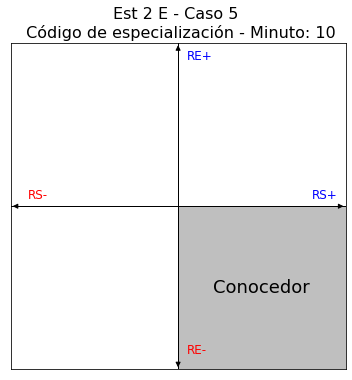

In [6]:
# (C)

from IPython.display import HTML, clear_output
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import time

# Obtener las columnas que terminan con 'E'
columnas_con_E = [col for col in df_filtrado.columns if col.endswith('E')]

fig, ax = plt.subplots(figsize=(6, 6))

nivel_esp = {
    4: "Élite",
    3: "Conocimiento",
    2: "Conocedor",
    1: "Relativista"
}

cuadrantes = {
    4: ([0, 1, 1, 0], [0, 0, 1, 1], 0.5, 0.5),
    3: ([0, -1, -1, 0], [0, 0, 1, 1], -0.5, 0.5),
    2: ([0, 1, 1, 0], [0, 0, -1, -1], 0.5, -0.5),
    1: ([0, -1, -1, 0], [0, 0, -1, -1], -0.5, -0.5)
}

def update(frame, col_name):
    ax.clear()

    if frame < len(df_filtrado):  # Verificar si estamos dentro de los límites del DataFrame
        codsw = df_filtrado[col_name].iloc[frame]

        ax.axhline(0, color='black', linewidth=1)
        ax.axvline(0, color='black', linewidth=1)
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)

        ax.annotate('', xy=(1, 0), xytext=(0.95, 0), arrowprops=dict(arrowstyle='-|>', color='black'))
        ax.annotate('', xy=(0, 1), xytext=(0, 0.95), arrowprops=dict(arrowstyle='-|>', color='black'))
        ax.annotate('', xy=(-1, 0), xytext=(-0.95, 0), arrowprops=dict(arrowstyle='-|>', color='black'))
        ax.annotate('', xy=(0, -1), xytext=(0, -0.95), arrowprops=dict(arrowstyle='-|>', color='black'))

        ax.text(0.05, 0.9, 'RE+', fontsize=12, color='blue')
        ax.text(0.05, -0.9, 'RE-', fontsize=12, color='red')
        ax.text(0.8, 0.05, 'RS+', fontsize=12, color='blue')
        ax.text(-0.9, 0.05, 'RS-', fontsize=12, color='red')

        if codsw in cuadrantes:
            x, y, text_x, text_y = cuadrantes[codsw]
            ax.fill(x, y, color='GRAY', alpha=0.5)
            ax.text(text_x, text_y, nivel_esp[codsw], fontsize=18, color='black', ha='center', va='center')

        ax.set_title(f'{col_name} - {caso} \n Código de especialización - Minuto: {df_filtrado["TIEMPO"].iloc[frame]}', fontsize=16)

        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(True)

    if frame == len(df_filtrado) - 1:
        clear_output(wait=True)  # Borrar la última imagen cuando termine la animación

# Iterar a través de las columnas y crear un archivo de video único para cada columna
for col_name in columnas_con_E:
    if not (df_filtrado[col_name] == 0).all():  # Verificar si la columna contiene solo ceros
        ani = FuncAnimation(fig, update, frames=len(df_filtrado), repeat=False, interval=2000, fargs=(col_name,))

        # Nombre del archivo de video con la etiqueta
        nombre_archivo_video = f'cuadrantes_caso_{caso}_{col_name}.mp4'

        # Guardar la animación en el archivo de video con el nombre actualizado
        ani.save(nombre_archivo_video, writer='ffmpeg')

        # Mostrar el video en el cuaderno
        display(HTML(ani.to_jshtml()))
    else:
        print(f"La columna '{col_name}' contiene solo ceros y no se creará un video para ella.")


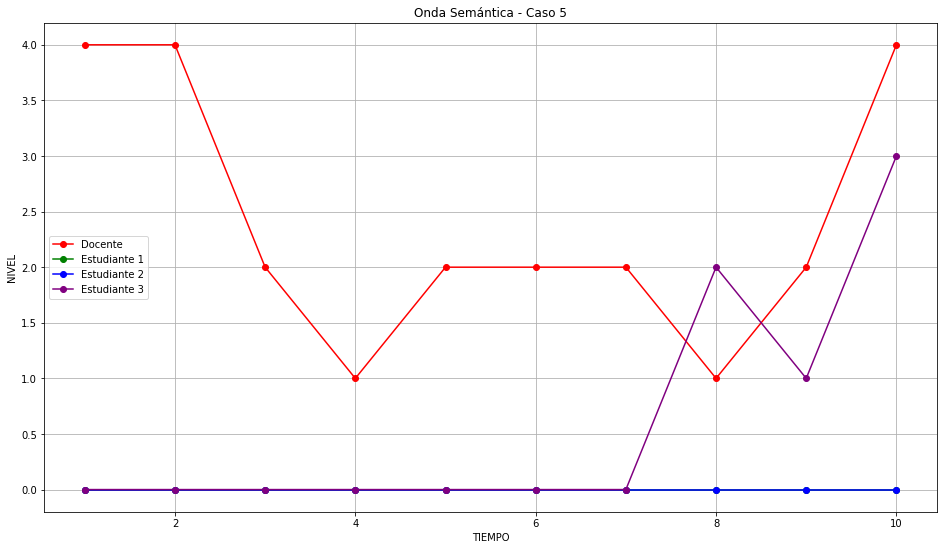

In [7]:
# (D)

# Cambiar paleta de colores actores
x = df_filtrado_C.iloc[:, 1]  # Tiempo
x1 = df_filtrado_C.iloc[:, 2]  # Docente
x1M = df_filtrado_C.iloc[:, 4]  # Docente código
x2 = df_filtrado_C.iloc[:, 5]  # Est 1
x2M = df_filtrado_C.iloc[:, 7]  # Est 1 código
x3 = df_filtrado_C.iloc[:, 8]  # Est 2
x3M = df_filtrado_C.iloc[:, 10]  # Est 2 código
x4 = df_filtrado_C.iloc[:, 11]  # Est 3
x4M = df_filtrado_C.iloc[:, 13]  # Est 3 código

# Definir el tamaño de la figura
plt.figure(figsize=(16, 9))  # 16:9 es la proporción de 1920x1080



# Graficar los datos
plt.plot(x, x1, marker='o', label='Docente', color='red')
plt.plot(x, x2, marker='o', label='Estudiante 1', color='green')
plt.plot(x, x4, marker='o', label='Estudiante 2', color='blue')
plt.plot(x, x3, marker='o', label='Estudiante 3', color='purple')

# Agregar etiquetas a los puntos correspondientes
plt.xlabel('TIEMPO')
plt.ylabel('NIVEL')
plt.title(f'Onda Semántica - {caso}')

# Agregar la leyenda
plt.legend()

plt.grid(True)  # Activar la rejilla

# Mostrar la figura
plt.show()


# Código semántica.


## Espacio bidimensional:
En el algoritmo para la representación del dispositivo de traducción del código de semántica, se implementó un algoritmo que, al extraer los datos que se corresponden con las variables a analizar, imprime en pantalla una gráfica que representa la ondulación semánticas de cada uno de los actores dentro del mismo plano, facilitando la visualización del perfil C, en el cual ubicamos en el eje de abscisas la variable tiempo, y en el eje de las ordenadas distribuimos el ascenso semántico gravedad / densidad, en valores enteros de uno a cuatro.

# Espacio tridimensional.
Se propone también la visualización en un espacio tridimensional de los actores, donde se pueda apreciar su ubicación bajo el código de semántica y código de especialización en el tiempo, de forma simultánea.

## Scatter

In [11]:
# (E)

import plotly.graph_objs as go
import pandas as pd
import plotly.io as pio

# Escalar el eje 'x' para que el espacio se vea como un cubo
df_filtrado_orig = df_filtrado.copy(deep=True)
x_max = df_filtrado['TIEMPO'].max()
df_filtrado['TIEMPO'] = df['TIEMPO'] / x_max

# Configurar diseño del gráfico
layout = go.Layout(
    title= f'Scatter semántica frente a especialización - {caso} ',  # Título del gráfico
    scene=dict(
        xaxis=dict(title='Tiempo'),
        yaxis=dict(title='Especialización'),
        zaxis=dict(title='Semántica'),
        bgcolor='lightgray', # Cambia 'lightgray' a 'rgba(0, 0, 0, 0)' para un fondo transparente
        aspectmode="cube"  # Para que el espacio se vea como un cubo
    ),
    margin=dict(l=0, r=0),
    height=800,
    width=800
)

# Función para agregar un rastro 3D al gráfico
def add_trace_3d(x, y, z, color, opacity, name):
    # Filtrar las coordenadas en cero
    x_filtered = [xi for xi, yi, zi in zip(x, y, z) if yi != 0 or zi != 0]
    y_filtered = [yi for yi, zi in zip(y, z) if yi != 0 or zi != 0]
    z_filtered = [zi for zi in z if zi != 0]

    return go.Scatter3d(
        x=x_filtered,
        y=y_filtered,
        z=z_filtered,
        mode='markers',
        marker=dict(
            size=10,
            symbol='circle',  # Utilizar el símbolo 'circle' para esferas
            color=color,
            opacity=opacity,
            line=dict(color='black', width=1)
        ),
        text=df_filtrado.index,
        name=name
    )

# Crear trazos 3D iniciales
traces = [
    add_trace_3d(df_filtrado['TIEMPO'], df_filtrado['DOCENTE E'], df_filtrado['DOCENTE S'], 'red', 0.8, 'DOCENTE'),
    add_trace_3d(df_filtrado['TIEMPO'], df_filtrado['Est 1 E'], df_filtrado['Est 1 S'], 'green', 0.8, 'Est 1'),
    add_trace_3d(df_filtrado['TIEMPO'], df_filtrado['Est 2 E'], df_filtrado['Est 2 S'], 'purple', 0.8, 'Est 2'),
    add_trace_3d(df_filtrado['TIEMPO'], df_filtrado['Est 3 E'], df_filtrado['Est 3 S'], 'blue', 0.8, 'Est 3')
]

# Crear una figura 3D
fig = go.Figure(layout=layout, data=traces)

# Crear una animación
frames = []
for i in range(1, len(df)):
    frame = go.Frame(
        data=[
            add_trace_3d(df_filtrado['TIEMPO'][:i], df_filtrado['DOCENTE E'][:i], df_filtrado['DOCENTE S'][:i], 'red', 0.8, 'DOCENTE'),
            add_trace_3d(df_filtrado['TIEMPO'][:i], df_filtrado['Est 1 E'][:i], df_filtrado['Est 1 S'][:i], 'green', 0.8, 'Est 1'),
            add_trace_3d(df_filtrado['TIEMPO'][:i], df_filtrado['Est 2 E'][:i], df_filtrado['Est 2 S'][:i], 'purple', 0.8, 'Est 2'),
            add_trace_3d(df_filtrado['TIEMPO'][:i], df_filtrado['Est 3 E'][:i], df_filtrado['Est 3 S'][:i], 'blue', 0.8, 'Est 3')
        ],
        name=f'Frame {i}'
    )
    frames.append(frame)

# Agregar los frames de animación
fig.update(frames=frames)

# Crear y mostrar la animación
#animation = pio.to_html(fig, full_html=False)
#with open(f'Cod_Esp_Sem_caso_{caso}.html', 'w') as f:   
    #f.write(animation)

# Mostrar la leyenda
fig.update_layout(showlegend=True)

# Mostrar el gráfico
fig.show()


C:\Users\ricar\AppData\Local\Temp\ipykernel_15756\1961659636.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Surface

In [ ]:
# (F)

import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio

# Escalar el eje 'x' para que el espacio se vea como un cubo
x_max = df_filtrado['TIEMPO'].max()
df_filtrado['TIEMPO'] = df['TIEMPO'] / x_max

# Crear una figura 3D
fig = go.Figure()

# Configurar diseño del gráfico
fig.update_layout(scene=dict(
    xaxis_title='TIEMPO',
    yaxis_title='ESPECIALIZACIÓN',
    zaxis_title='SEMÁNTICA',
    yaxis=dict(range=[0, 5]),  # Establecer el rango fijo para 'ESPECIALIZACIÓN'
    zaxis=dict(range=[0, 5]),  # Establecer el rango fijo para 'SEMÁNTICA'
),
    width=1080,
    margin=dict(r=20, b=10, l=10, t=10),
    scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=0.5, y=1, z=2))
)

# Ajustar la posición vertical del título
fig.update_layout(
    title=f'Ondas de códigos de semántica y especialización en el tiempo - {caso}',
    scene_aspectmode='cube',  # Para que el espacio se vea como un cubo
    title_y=0.9  # Ajusta este valor para controlar la posición vertical del título
)

# Mostrar la leyenda
fig.update_layout(showlegend=True)

# Función para agregar un rastro 3D al gráfico con etiquetas
def add_trace_3d_with_labels(x, y, z, color, opacity, name, labels):
    return go.Mesh3d(
        x=x,
        y=y,
        z=z,
        opacity=opacity,
        color=color,
        name=name,
        text=labels,  # Agregar etiquetas a los puntos
        hoverinfo='text'  # Mostrar etiquetas al pasar el cursor sobre los puntos
    )

# Crear trazos 3D iniciales con etiquetas
traces = [
    add_trace_3d_with_labels(df_filtrado['TIEMPO'], df_filtrado['DOCENTE E'], df_filtrado['DOCENTE S'], 'red', 0.7, 'DOCENTE', df_filtrado['DOCENTE CODIGO M']),
    add_trace_3d_with_labels(df_filtrado['TIEMPO'], df_filtrado['Est 1 E'], df_filtrado['Est 1 S'], 'green', 0.5, 'ESTUDIANTE 1', df_filtrado['Est 1 CODIGO M']),
    add_trace_3d_with_labels(df_filtrado['TIEMPO'], df_filtrado['Est 2 E'], df_filtrado['Est 2 S'], 'purple', 0.4, 'ESTUDIANTE 2', df_filtrado['Est 2 CODIGO M']),
    add_trace_3d_with_labels(df_filtrado['TIEMPO'], df_filtrado['Est 3 E'], df_filtrado['Est 3 S'], 'blue', 0.3, 'ESTUDIANTE 3', df_filtrado['Est 3 CODIGO M'])
]

# Agregar los trazos 3D al gráfico
for trace in traces:
    fig.add_trace(trace)

# Crear una animación
frames = []
for i in range(1, len(df_filtrado)):
    frame = go.Frame(
        data=[
            add_trace_3d(df_filtrado['TIEMPO'][:i], df_filtrado['DOCENTE E'][:i], df_filtrado['DOCENTE S'][:i], 'red', 0.8, 'DOCENTE'),
            add_trace_3d(df_filtrado['TIEMPO'][:i], df_filtrado['Est 1 E'][:i], df_filtrado['Est 1 S'][:i], 'green', 0.5, 'ESTUDIANTE 1'),
            add_trace_3d(df_filtrado['TIEMPO'][:i], df_filtrado['Est 2 E'][:i], df_filtrado['Est 2 S'][:i], 'purple', 0.8, 'ESTUDIANTE 2'),
            add_trace_3d(df_filtrado['TIEMPO'][:i], df_filtrado['Est 3 E'][:i], df_filtrado['Est 3 S'][:i], 'blue', 0.5, 'ESTUDIANTE 3')
        ],
        name=f'Frame {i}'
    )
    frames.append(frame)

# Agregar los frames de animación
fig.update(frames=frames)

# Crear y mostrar la animación
animation = pio.to_html(fig, full_html=False)
with open(f'Ondas Cod_Sem Vs Cod_Esp_{caso}.html', 'w') as f:
    f.write(animation)

fig.update(frames=frames)
fig.show()

<ipython-input-10-3f467538c5aa>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

